In [1]:
# 1. Setup and Load Data 
# 1.1 Install Dependencies and setup
pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\DELL\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-4d3yv12s\\tensorflow-gpu_dc72c972f28642d9802b930e92583706\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-4d3yv12s\\tensorflow-gpu_dc72c972f28642d9802b930e92583706\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\DELL\AppData\Local\Temp\pip-wheel-115p_wnu'
       cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-4d3yv12s\tensorflow-gpu_dc72c972f28642d9802b930e92583706\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\D

  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5



Consider using the `--user` option or check the permissions.



In [4]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached grpcio-1.56.2-cp39-cp39-win_am

In [5]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
arch                          5.3.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [9]:
import tensorflow as tf
import os

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [11]:
len(gpus)

0

In [12]:
# Avoid OOM errors by selecting GPU memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
pip install opencv-python

  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
# 1.2 Remove doggy images 
import cv2
import imghdr
from matplotlib import pyplot as plt

In [14]:
data_dir = 'Data'

In [15]:
os.listdir(data_dir)
#os.listdir(os.path.join(data_dir, 'happy'))
#os.listdir(os.path.join(data_dir, 'sad'))

['happy', 'sad']

In [16]:
image_exts = ['jpeg','jpg','bmp','png']

In [17]:
img  = cv2.imread(os.path.join('Data','happy','154006829.jpg'))

In [18]:
img.shape

(3744, 5616, 3)

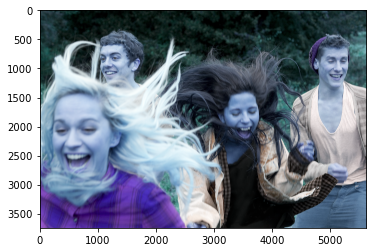

In [22]:
plt.imshow(img)

In [23]:
#Removing doggy images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Data\happy\2560px-Happy_People.jpg
Image not in ext list Data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list Data\happy\depositphotos_25307393-stock-photo-relaxing-at-hom.jpg
Image not in ext list Data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list Data\happy\hile-collaborating-on-a-new-project-in-an-office-group-of-diverse-2159023891.jpg
Image not in ext list Data\happy\oman-and-diverse-friends-hanging-out-in-a-cafe-together-after-the-2290057229.jpg
Image not in ext list Data\sad\32EDF19200000578-3527321-image-a-5_1460022979779.jpg
Image not in ext list Data\sad\39843138-sad-man.jpg
Image not in ext list Data\sad\50740738-sad-people-s-portraits.jpg
Image not in ext list Data\sad\5TRX6BRpc.gif
Image not in ext list Data\sad\depositphotos_41329389-stock-photo-sad-girl-on-the-windowsill.jpg
Image not in ext list Data\sad\depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in ext li

In [ ]:
#Loading the Data 

In [24]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [119]:
#Building a data pipeline
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 173 files belonging to 2 classes.


In [87]:
#Acessing the data pipeline
data_iterator = data.as_numpy_iterator()

In [81]:
batch = data_iterator.next()

In [34]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [35]:
#Class 0 happy ppl
#class 1 sad ppl
batch[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

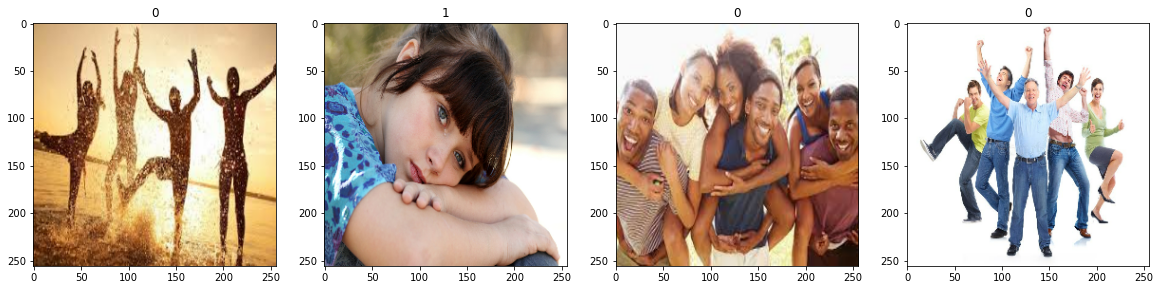

In [110]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# 2.Preprocessing Data
# 2.1 Scale Data

In [120]:
data = data.map(lambda x, y: (x/255, y))

In [122]:
data.as_numpy_iterator().next()

(array([[[[0.15603554, 0.38431373, 0.5294118 ],
          [0.14529718, 0.38679534, 0.53809744],
          [0.12691483, 0.39008886, 0.5547947 ],
          ...,
          [0.597932  , 0.7665594 , 0.8410692 ],
          [0.6       , 0.76862746, 0.84313726],
          [0.60350794, 0.77213544, 0.84664524]],
 
         [[0.1833695 , 0.40826666, 0.5496072 ],
          [0.17911434, 0.41600457, 0.5591294 ],
          [0.15215744, 0.4008593 , 0.5512882 ],
          ...,
          [0.59887314, 0.7675006 , 0.8420104 ],
          [0.6       , 0.76862746, 0.84313726],
          [0.60350794, 0.77213544, 0.84664524]],
 
         [[0.21401449, 0.43423736, 0.56960076],
          [0.21557908, 0.4433883 , 0.5740105 ],
          [0.19262776, 0.41725194, 0.5449562 ],
          ...,
          [0.6       , 0.76862746, 0.84313726],
          [0.6002461 , 0.7688735 , 0.8433833 ],
          [0.6035459 , 0.77217335, 0.84668314]],
 
         ...,
 
         [[0.54401845, 0.45774388, 0.16006467],
          [0.50396

In [123]:
len(data)

6

In [124]:
#2.2 Split data 
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [125]:
test_size+train_size+val_size

6

In [126]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [127]:
len(val)

1

In [ ]:
# Building Deep Learning Model

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [130]:
model = Sequential()

In [131]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [132]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
#Training

In [134]:
logdir='logs'

In [135]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [136]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 0.7724 - accuracy: 0.5391 - val_loss: 0.6369 - val_accuracy: 0.7188
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6345 - accuracy: 0.6328 - val_loss: 0.6275 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 16s 3s/step - loss: 0.6030 - accuracy: 0.6328 - val_loss: 0.5789 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 19s 3s/step - loss: 0.5707 - accuracy: 0.6641 - val_loss: 0.5217 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 16s 3s/step - loss: 0.5348 - accuracy: 0.8281 - val_loss: 0.4595 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 16s 3s/step - loss: 0.4914 - accuracy: 0.6797 - val_loss: 0.4721 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 19s 4s/step - loss: 0.4550 - accuracy: 0.7578 - val_loss: 0.4080 - val_accuracy: 0.7812
Epoch 8/20
4/4 [==================

In [ ]:
#Plot performance

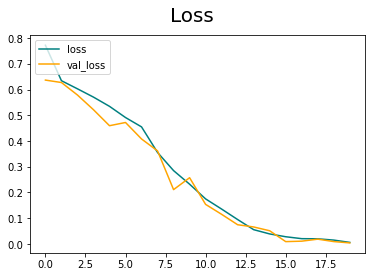

In [137]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

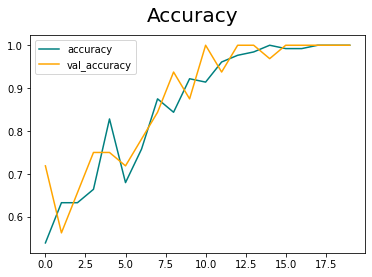

In [138]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluation

In [139]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [140]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [141]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 464ms/step


In [144]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [ ]:
#Testing

In [147]:
import cv2

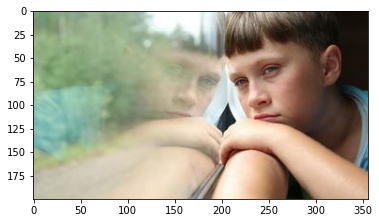

In [154]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

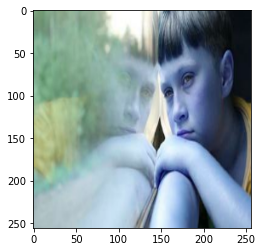

In [155]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [156]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [157]:
yhat

array([[0.9942283]], dtype=float32)

In [158]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
#Saving the model

In [159]:
from tensorflow.keras.models import load_model

In [160]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [164]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [165]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 163ms/step


array([[0.9942283]], dtype=float32)